### Employee Attrition and Factors

Dane: https://www.kaggle.com/datasets/thedevastator/employee-attrition-and-factors

Cel: zbadanie nastrojów wśród pracowników organizacji, w kontekście ich
możliwości awansu lub odejścia.

Stakeholder: dział HR potrzebuje insightów na temat pracowników, którzy odeszli z
firmy i ryzyka jakim obarczone są osoby, które przez dłuższy czas pozostają bez
awansu


In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [2]:
df = pd.read_csv('HR_Analytics.csv.csv')

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [7]:
cols = ['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']

In [8]:
for i in cols:
    print(f'Liczba kategorii zmiennej {i}: \n {df[i].value_counts()}')

Liczba kategorii zmiennej Age: 
 Age
35    78
34    77
36    69
31    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
25    26
24    26
49    24
47    24
55    22
51    19
53    19
48    19
54    18
52    18
22    16
56    14
23    14
58    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: count, dtype: int64
Liczba kategorii zmiennej Attrition: 
 Attrition
No     1233
Yes     237
Name: count, dtype: int64
Liczba kategorii zmiennej BusinessTravel: 
 BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64
Liczba kategorii zmiennej DailyRate: 
 DailyRate
691     6
408     5
530     5
1329    5
1082    5
       ..
650     1
279     1
316     1
314     1
628     1
Name: count, Length: 886, dtype: int64
Liczba kategorii zmiennej Department: 
 Department
Research & Development    961
Sales    

In [9]:
df_attrition = df[df['Attrition'] == 'Yes']

In [10]:
df_attrition.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.000000,237.000000,237.000000,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,...,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,750.362869,10.632911,2.839662,1.0,1010.345992,2.464135,65.573840,2.518987,1.637131,...,2.599156,80.0,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,401.899519,8.452525,1.008244,0.0,580.750572,1.169791,20.099958,0.773405,0.940594,...,1.125437,0.0,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,103.000000,1.000000,1.000000,1.0,1.000000,1.000000,31.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,408.000000,3.000000,2.000000,1.0,514.000000,1.000000,50.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,699.000000,9.000000,3.000000,1.0,1017.000000,3.000000,66.000000,3.000000,1.000000,...,3.000000,80.0,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1092.000000,17.000000,4.000000,1.0,1486.000000,4.000000,84.000000,3.000000,2.000000,...,4.000000,80.0,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1496.000000,29.000000,5.000000,1.0,2055.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


In [11]:
for i in cols:
    print(f'Liczba kategorii zmiennej {i}: \n {df_attrition[i].value_counts()}')

Liczba kategorii zmiennej Age: 
 Age
31    18
29    18
28    14
33    12
26    12
32    11
35    10
34     9
30     9
24     7
21     6
44     6
37     6
19     6
41     6
25     6
20     6
39     6
36     6
40     5
50     5
22     5
58     5
23     4
46     4
18     4
56     3
55     3
27     3
52     3
47     3
48     2
45     2
42     2
38     2
51     2
49     2
43     2
53     2
Name: count, dtype: int64
Liczba kategorii zmiennej Attrition: 
 Attrition
Yes    237
Name: count, dtype: int64
Liczba kategorii zmiennej BusinessTravel: 
 BusinessTravel
Travel_Rarely        156
Travel_Frequently     69
Non-Travel            12
Name: count, dtype: int64
Liczba kategorii zmiennej DailyRate: 
 DailyRate
1475    2
289     2
350     2
303     2
575     2
       ..
725     1
1146    1
1243    1
805     1
410     1
Name: count, Length: 219, dtype: int64
Liczba kategorii zmiennej Department: 
 Department
Research & Development    133
Sales                      92
Human Resources            12
N

In [12]:
corr = df.corr(numeric_only=True)
cm = sns.light_palette("green", as_cmap=True)
cm = sns.diverging_palette(220, 20, sep=20, as_cmap=True)
corr.style.background_gradient(cmap=cm)

c:\Users\mierz\anaconda3\envs\infoshare_virtual_env\Lib\site-packages\pandas\io\formats\style.py:3819: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
c:\Users\mierz\anaconda3\envs\infoshare_virtual_env\Lib\site-packages\pandas\io\formats\style.py:3820: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,nan,-0.010145,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,0.028051,0.299635,0.003634,0.001904,0.053535,nan,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,nan,-0.050990,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,-0.032182,0.038153,0.022704,0.000473,0.007846,nan,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,nan,0.032916,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,0.027473,-0.029251,0.040235,0.027110,0.006557,nan,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,nan,0.042070,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,-0.026084,0.126317,-0.011111,-0.024539,-0.009118,nan,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,nan,1.000000,0.017621,0.035179,-0.006888,-0.018519,-0.046247,-0.014829,0.012648,-0.001251,-0.012944,-0.020359,-0.069861,nan,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,nan,0.017621,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,0.037600,0.012594,-0.031701,-0.029548,0.007665,nan,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,nan,0.035179,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,-0.015297,0.022157,-0.009062,-0.002172,0.001330,nan,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,nan,-0.006888,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,-0.016322,0.015012,-0.017205,-0.029071,0.034297,nan,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,nan,-0.018519,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,0.039563,0.142501,-0.034730,-0.021222,0.021642,nan,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


### ANALIZA POD KĄTEM ŻYCIA PRYWATNEGO

Prywatne życie pracownika - kto odchodzi najczęściej, kto pozostaje bez awansu

Factores: 

'Attrition'

'Age', 'Gender', 'MaritalStatus',

'BusinessTravel', 'DistanceFromHome', 

'Education', 'EducationField', 

'NumCompaniesWorked', 'TotalWorkingYears',

'OverTime',

'WorkLifeBalance'

Podzielilabym pracownikow na grupy wiekowe i przeprowadzila analize w tym kierunku:

18 - 22 - młodzi ludzie - single bez ukończonych pełnych studiów - poniżej magistra

22 - 30

30 - 40

40 - 50

50 - 60

In [13]:
cols_personal = ['Attrition', 'EmployeeCount', 'Age', 'Gender', 'MaritalStatus',
                 'Education', 'EducationField', 'BusinessTravel', 'DistanceFromHome',
                 'NumCompaniesWorked', 'TotalWorkingYears', 'YearsAtCompany',
                 'OverTime', 'WorkLifeBalance', 'RelationshipSatisfaction']

In [14]:
df_personal = df[cols_personal].copy()

In [15]:
df_personal

,Attrition,EmployeeCount,Age,Gender,MaritalStatus,Education,EducationField,BusinessTravel,DistanceFromHome,NumCompaniesWorked,TotalWorkingYears,YearsAtCompany,OverTime,WorkLifeBalance,RelationshipSatisfaction
0,Yes,1,41,Female,Single,2,Life Sciences,Travel_Rarely,1,8,8,6,Yes,1,1
1,No,1,49,Male,Married,1,Life Sciences,Travel_Frequently,8,1,10,10,No,3,4
2,Yes,1,37,Male,Single,2,Other,Travel_Rarely,2,6,7,0,Yes,3,2
3,No,1,33,Female,Married,4,Life Sciences,Travel_Frequently,3,1,8,8,Yes,3,3
4,No,1,27,Male,Married,1,Medical,Travel_Rarely,2,9,6,2,No,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,No,1,36,Male,Married,2,Medical,Travel_Frequently,23,4,17,5,No,3,3
1466,No,1,39,Male,Married,1,Medical,Travel_Rarely,6,4,9,7,No,3,1
1467,No,1,27,Male,Married,3,Life Sciences,Travel_Rarely,4,1,6,6,Yes,3,2
1468,No,1,49,Male,Married,3,Medical,Travel_Frequently,2,2,17,9,No,2,4


Podzial na kategorie wiekowe

In [16]:
bins_age = [18, 22, 30, 40, 50, 61]

# Define the labels for the age categories
labels_age = ['18-21', '22-29', '30-39', '40-49', '50-60']

df_personal["AgeCategory"] = pd.cut(df_personal['Age'], bins=bins_age, labels=labels_age, right=False)
df_personal.head(10)

,Attrition,EmployeeCount,Age,Gender,MaritalStatus,Education,EducationField,BusinessTravel,DistanceFromHome,NumCompaniesWorked,TotalWorkingYears,YearsAtCompany,OverTime,WorkLifeBalance,RelationshipSatisfaction,AgeCategory
0,Yes,1,41,Female,Single,2,Life Sciences,Travel_Rarely,1,8,8,6,Yes,1,1,40-49
1,No,1,49,Male,Married,1,Life Sciences,Travel_Frequently,8,1,10,10,No,3,4,40-49
2,Yes,1,37,Male,Single,2,Other,Travel_Rarely,2,6,7,0,Yes,3,2,30-39
3,No,1,33,Female,Married,4,Life Sciences,Travel_Frequently,3,1,8,8,Yes,3,3,30-39
4,No,1,27,Male,Married,1,Medical,Travel_Rarely,2,9,6,2,No,3,4,22-29
5,No,1,32,Male,Single,2,Life Sciences,Travel_Frequently,2,0,8,7,No,2,3,30-39
6,No,1,59,Female,Married,3,Medical,Travel_Rarely,3,4,12,1,Yes,2,1,50-60
7,No,1,30,Male,Divorced,1,Life Sciences,Travel_Rarely,24,1,1,1,No,3,2,30-39
8,No,1,38,Male,Single,3,Life Sciences,Travel_Frequently,23,0,10,9,No,3,2,30-39
9,No,1,36,Male,Married,3,Medical,Travel_Rarely,27,6,17,7,No,2,2,30-39


In [17]:
df_personal.describe()

,EmployeeCount,Age,Education,DistanceFromHome,NumCompaniesWorked,TotalWorkingYears,YearsAtCompany,WorkLifeBalance,RelationshipSatisfaction
count,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,1.0,36.923810,2.912925,9.192517,2.693197,11.279592,7.008163,2.761224,2.712245
std,0.0,9.135373,1.024165,8.106864,2.498009,7.780782,6.126525,0.706476,1.081209
min,1.0,18.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.0,30.000000,2.000000,2.000000,1.000000,6.000000,3.000000,2.000000,2.000000
50%,1.0,36.000000,3.000000,7.000000,2.000000,10.000000,5.000000,3.000000,3.000000
75%,1.0,43.000000,4.000000,14.000000,4.000000,15.000000,9.000000,3.000000,4.000000
max,1.0,60.000000,5.000000,29.000000,9.000000,40.000000,40.000000,4.000000,4.000000


Ile procentowo osob odchodzi

In [18]:
df_personal['Attrition'].value_counts()/df_personal['Attrition'].value_counts().sum()

Attrition
No     0.838776
Yes    0.161224
Name: count, dtype: float64

Jak się procentowo rozklada wiek w firmie

In [19]:
df_personal['AgeCategory'].value_counts()/df_personal['AgeCategory'].value_counts().sum()

AgeCategory
30-39    0.423129
40-49    0.237415
22-29    0.193878
50-60    0.117687
18-21    0.027891
Name: count, dtype: float64

Najwięcej w firmie jest ludzi w wieku 30-39 - ponad 40%

Procentowo rozklad plci w firmie

In [20]:
df_personal['Gender'].value_counts()/df_personal['Gender'].value_counts().sum()

Gender
Male      0.6
Female    0.4
Name: count, dtype: float64

### Płeć

In [21]:
df_gen_temp = df_personal.groupby(['Gender'])['Gender'].value_counts().reset_index(name='Sum')
df_gen_temp 

,Gender,Sum
0,Female,588
1,Male,882


In [22]:
attrition_counts_gen = df_personal.groupby(['Gender'])['Attrition'].value_counts().unstack(fill_value=0)

attrition_counts_gen.columns = ['AttNo', 'AttYes']
attrition_counts_gen

,AttNo,AttYes
Gender,,
Female,501,87
Male,732,150


In [23]:
df_gen_temp = df_gen_temp.merge(attrition_counts_gen, how='left', on=['Gender'])

df_gen_temp

,Gender,Sum,AttNo,AttYes
0,Female,588,501,87
1,Male,882,732,150


In [24]:
df_gen_temp['AttNoPerc'] = (df_gen_temp['AttNo'] / df_gen_temp['Sum'] * 100).round(2)
df_gen_temp['AttYesPerc'] = (df_gen_temp['AttYes'] / df_gen_temp['Sum'] * 100).round(2)
df_gen_temp

,Gender,Sum,AttNo,AttYes,AttNoPerc,AttYesPerc
0,Female,588,501,87,85.20,14.80
1,Male,882,732,150,82.99,17.01


Wniosek: Płeć sama w sobie nie ma wpływu na ilość zwolnień. Wynik jest podobny - 15 i 17 %

Sprawdzmy czy płeć w połączeniu z innymi współczynnikami może mieć jakiś wpływ na ilość zwolnień

### Wiek

In [25]:
df_personal[['AgeCategory', 'Gender', 'Attrition']].value_counts().reset_index(name='count')

,AgeCategory,Gender,Attrition,count
0,30-39,Male,No,314
1,30-39,Female,No,219
2,40-49,Male,No,185
3,22-29,Male,No,140
4,40-49,Female,No,130
5,50-60,Male,No,82
6,22-29,Female,No,76
7,50-60,Female,No,68
8,30-39,Male,Yes,57
9,22-29,Male,Yes,45


In [26]:
df_agegen_temp = df_personal.groupby(['AgeCategory', 'Gender'])['AgeCategory'].value_counts().reset_index(name='Sum')
df_agegen_temp 

C:\Users\mierz\AppData\Local\Temp\ipykernel_11560\3966560375.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_agegen_temp = df_personal.groupby(['AgeCategory', 'Gender'])['AgeCategory'].value_counts().reset_index(name='Sum')


,AgeCategory,Gender,Sum
0,18-21,Female,20
1,18-21,Male,21
2,22-29,Female,100
3,22-29,Male,185
4,30-39,Female,251
5,30-39,Male,371
6,40-49,Female,144
7,40-49,Male,205
8,50-60,Female,73
9,50-60,Male,100


In [27]:
attrition_counts = df_personal.groupby(['AgeCategory', 'Gender'])['Attrition'].value_counts().unstack(fill_value=0)

attrition_counts.columns = ['AttNo', 'AttYes']
attrition_counts

C:\Users\mierz\AppData\Local\Temp\ipykernel_11560\4045124757.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  attrition_counts = df_personal.groupby(['AgeCategory', 'Gender'])['Attrition'].value_counts().unstack(fill_value=0)


AttNo  AttYes
AgeCategory Gender               
18-21       Female      8      12
            Male       11      10
22-29       Female     76      24
            Male      140      45
30-39       Female    219      32
            Male      314      57
40-49       Female    130      14
            Male      185      20
50-60       Female     68       5
            Male       82      18

In [28]:
df_agegen_temp = df_agegen_temp.merge(attrition_counts, how='left', on=['AgeCategory', 'Gender'])

df_agegen_temp

,AgeCategory,Gender,Sum,AttNo,AttYes
0,18-21,Female,20,8,12
1,18-21,Male,21,11,10
2,22-29,Female,100,76,24
3,22-29,Male,185,140,45
4,30-39,Female,251,219,32
5,30-39,Male,371,314,57
6,40-49,Female,144,130,14
7,40-49,Male,205,185,20
8,50-60,Female,73,68,5
9,50-60,Male,100,82,18


In [29]:
df_agegen_temp['AttNoPerc'] = (df_agegen_temp['AttNo'] / df_agegen_temp['Sum'] * 100).round(2)
df_agegen_temp['AttYesPerc'] = (df_agegen_temp['AttYes'] / df_agegen_temp['Sum'] * 100).round(2)
df_agegen_temp

,AgeCategory,Gender,Sum,AttNo,AttYes,AttNoPerc,AttYesPerc
0,18-21,Female,20,8,12,40.00,60.00
1,18-21,Male,21,11,10,52.38,47.62
2,22-29,Female,100,76,24,76.00,24.00
3,22-29,Male,185,140,45,75.68,24.32
4,30-39,Female,251,219,32,87.25,12.75
5,30-39,Male,371,314,57,84.64,15.36
6,40-49,Female,144,130,14,90.28,9.72
7,40-49,Male,205,185,20,90.24,9.76
8,50-60,Female,73,68,5,93.15,6.85
9,50-60,Male,100,82,18,82.00,18.00


<Figure size 2000x1500 with 0 Axes>

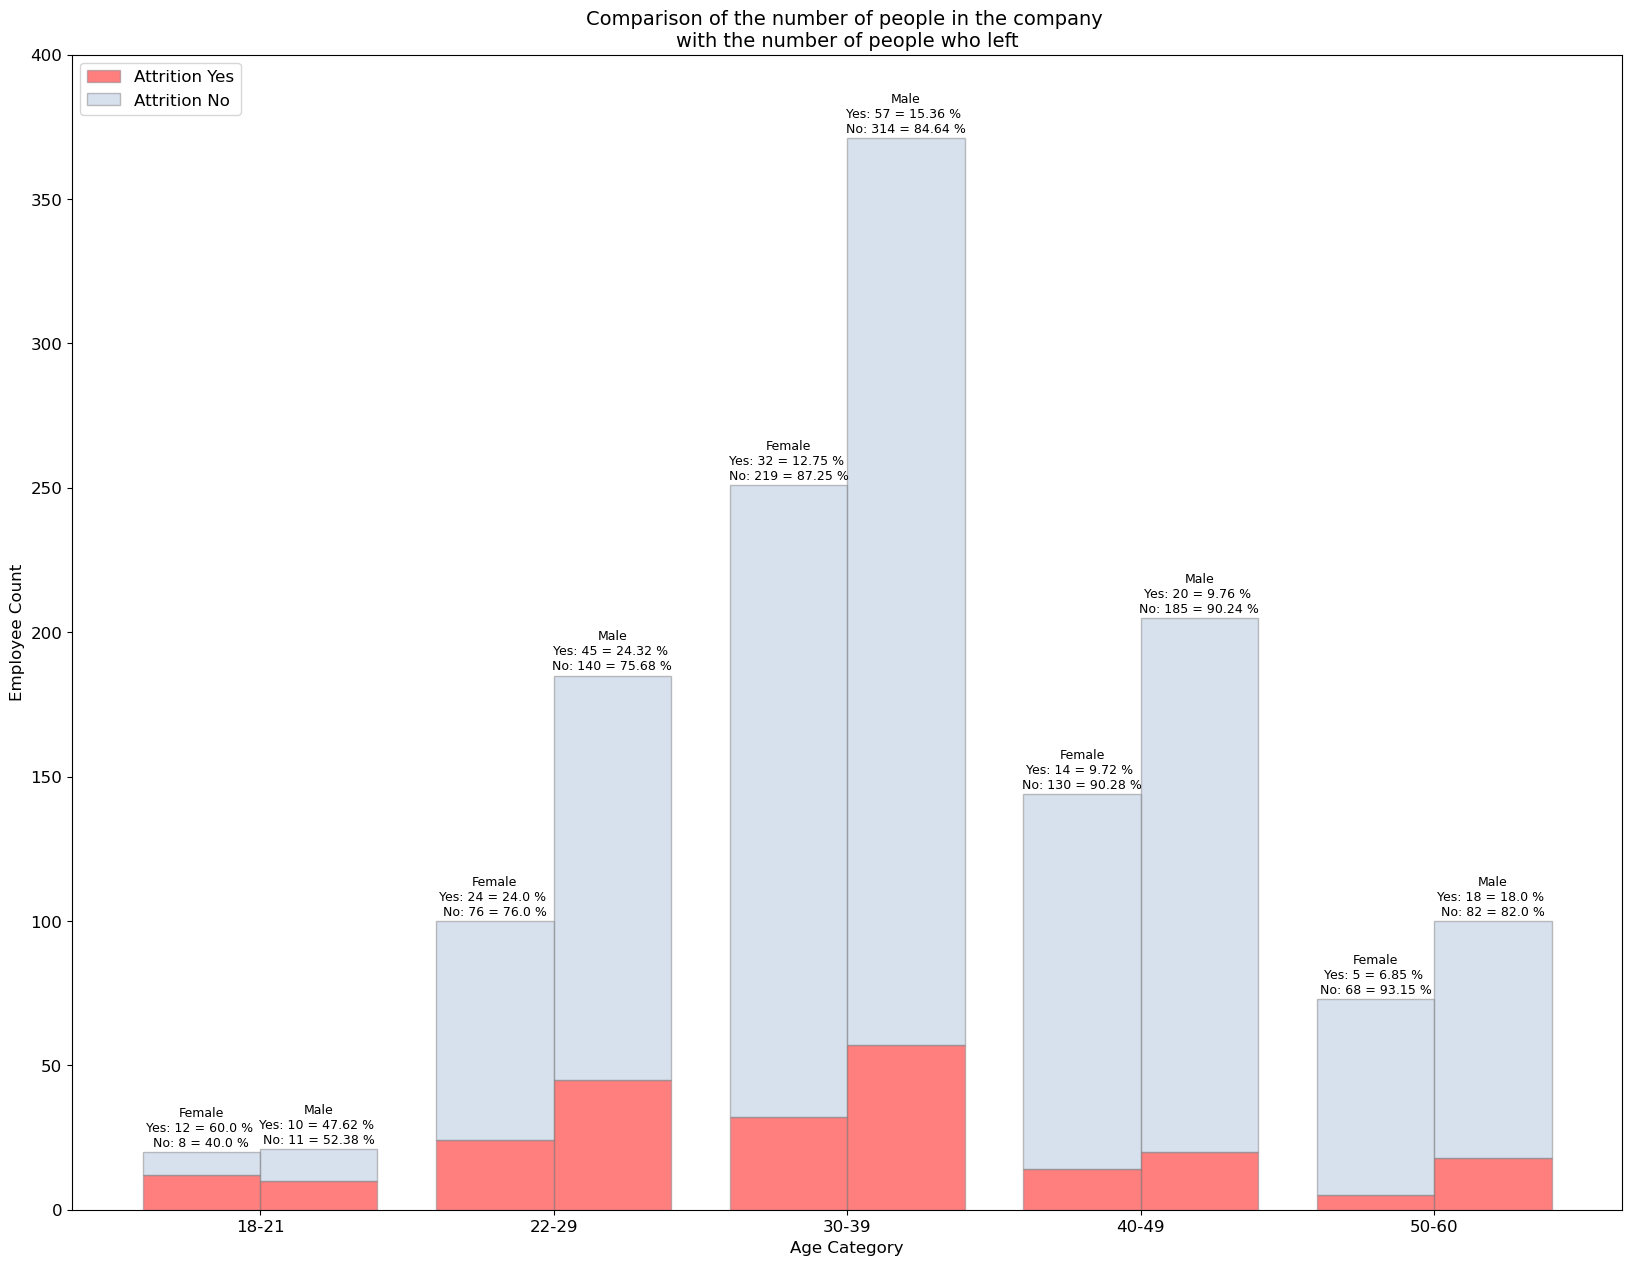

In [30]:
plt.figure(figsize=(20, 15))

# Get unique AgeCategories and Genders
age_categories = df_agegen_temp['AgeCategory'].unique()
genders = df_agegen_temp['Gender'].unique()

# Set width of bar
bar_width = 0.4

# Set position of bar on X axis
r = np.arange(len(age_categories))

# Plot
fig, ax = plt.subplots(figsize=(20, 15))

# Iterate over Genders
for i, gender in enumerate(genders):
    # Get data for the current Gender
    gender_data = df_agegen_temp[df_agegen_temp['Gender'] == gender]
    
    # Calculate the position of the bars for the current Gender
    bar_position = r + (i - 0.5) * bar_width + (len(genders) * bar_width / 2)
    
    # Create bars for 'AttYes' and 'AttNo' for each Gender
    ax.bar(bar_position, gender_data['AttYes'], color='r', alpha = 0.5, width=bar_width, edgecolor='grey', label='Attrition Yes' if i == 0 else None)
    ax.bar(bar_position, gender_data['AttNo'], color='lightsteelblue', alpha = 0.5, width=bar_width, edgecolor='grey', bottom=gender_data['AttYes'], label='Attrition No' if i == 0 else None)
    
    # Add labels for subcategories
    for j, value in enumerate(gender_data['AttYes'] + gender_data['AttNo']):
        ax.text(bar_position[j], value + 2, f'{gender}\nYes: {gender_data.iloc[j]["AttYes"]} = {gender_data.iloc[j]["AttYesPerc"]} % \nNo: {gender_data.iloc[j]["AttNo"]} = {gender_data.iloc[j]["AttNoPerc"]} %', ha='center', fontsize=9)

# Add xticks on the middle of the group bars
plt.xlabel('Age Category', fontsize=12)
plt.ylabel('Employee Count', fontsize=12)
plt.title('Comparison of the number of people in the company \nwith the number of people who left', fontsize=14)
plt.xticks(r + (bar_width * len(genders) / 2), age_categories, fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, 400)
plt.legend(loc='upper left', fontsize=12)


# Show plot
plt.show()

Wniosek: Pracownikicy w wieku 18-29 zwalniają się najczęściej.

Zaskakujące jest to, że mężczyzni w wieku 50-60 zwalniają się prawie 3 razy częściej niż kobiety w tej grupie wiekowej.

Grupa wiekowa 30-39 - mężczyźni i kobiety śrenio 15 i 13 % zwolnień

Grupa wiekowa 40-40 - mężczyźni i kobiety około 10 % zwolnień

### Sam wiek

In [31]:
df_age_temp = df_personal.groupby(['AgeCategory', 'EmployeeCount'])['AgeCategory'].value_counts().reset_index(name='Sum')
df_age_temp 

C:\Users\mierz\AppData\Local\Temp\ipykernel_11560\3841571381.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_age_temp = df_personal.groupby(['AgeCategory', 'EmployeeCount'])['AgeCategory'].value_counts().reset_index(name='Sum')


,AgeCategory,EmployeeCount,Sum
0,18-21,1,41
1,22-29,1,285
2,30-39,1,622
3,40-49,1,349
4,50-60,1,173


In [32]:
attrition_counts_age = df_personal.groupby(['AgeCategory', 'EmployeeCount'])['Attrition'].value_counts().unstack(fill_value=0)

attrition_counts_age.columns = ['AttNo', 'AttYes']
attrition_counts_age

C:\Users\mierz\AppData\Local\Temp\ipykernel_11560\384714076.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  attrition_counts_age = df_personal.groupby(['AgeCategory', 'EmployeeCount'])['Attrition'].value_counts().unstack(fill_value=0)


,,AttNo,AttYes
AgeCategory,EmployeeCount,,
18-21,1,19,22
22-29,1,216,69
30-39,1,533,89
40-49,1,315,34
50-60,1,150,23


In [33]:
df_age_temp = df_age_temp.merge(attrition_counts_age, how='left', on=['AgeCategory'])

df_age_temp

,AgeCategory,EmployeeCount,Sum,AttNo,AttYes
0,18-21,1,41,19,22
1,22-29,1,285,216,69
2,30-39,1,622,533,89
3,40-49,1,349,315,34
4,50-60,1,173,150,23


In [34]:
df_age_temp['AttNoPerc'] = (df_age_temp['AttNo'] / df_age_temp['Sum'] * 100).round(2)
df_age_temp['AttYesPerc'] = (df_age_temp['AttYes'] / df_age_temp['Sum'] * 100).round(2)
df_age_temp

,AgeCategory,EmployeeCount,Sum,AttNo,AttYes,AttNoPerc,AttYesPerc
0,18-21,1,41,19,22,46.34,53.66
1,22-29,1,285,216,69,75.79,24.21
2,30-39,1,622,533,89,85.69,14.31
3,40-49,1,349,315,34,90.26,9.74
4,50-60,1,173,150,23,86.71,13.29


Po samym wieku również widać, że młodzi zwalniają się znacznie częściej niż starsi

### Marital status

Sprawdzmy czy stan cywilny może bardziej szczegolowo wybrac osoby, które czesciej zmieniaja prace

In [35]:
df_personal['MaritalStatus'].value_counts()/df_personal['MaritalStatus'].value_counts().sum()

MaritalStatus
Married     0.457823
Single      0.319728
Divorced    0.222449
Name: count, dtype: float64

In [36]:
df_personal[['AgeCategory', 'Gender', 'MaritalStatus', 'Attrition']].value_counts().reset_index(name='count')

,AgeCategory,Gender,MaritalStatus,Attrition,count
0,30-39,Male,Married,No,149
1,30-39,Female,Married,No,106
2,40-49,Male,Married,No,85
3,30-39,Male,Divorced,No,83
4,30-39,Male,Single,No,82
5,30-39,Female,Single,No,75
6,22-29,Male,Married,No,68
7,40-49,Female,Married,No,65
8,40-49,Male,Divorced,No,50
9,40-49,Male,Single,No,50


In [37]:
df_agegenmaratt_temp = df_personal.groupby(['AgeCategory', 'Gender', 'MaritalStatus', 'Attrition'])['AgeCategory'].value_counts().reset_index(name='count')
df_agegenmaratt_temp

C:\Users\mierz\AppData\Local\Temp\ipykernel_11560\2115165407.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_agegenmaratt_temp = df_personal.groupby(['AgeCategory', 'Gender', 'MaritalStatus', 'Attrition'])['AgeCategory'].value_counts().reset_index(name='count')


,AgeCategory,Gender,MaritalStatus,Attrition,count
0,18-21,Female,Divorced,No,0
1,18-21,Female,Divorced,Yes,0
2,18-21,Female,Married,No,0
3,18-21,Female,Married,Yes,0
4,18-21,Female,Single,No,8
5,18-21,Female,Single,Yes,12
6,18-21,Male,Divorced,No,0
7,18-21,Male,Divorced,Yes,0
8,18-21,Male,Married,No,0
9,18-21,Male,Married,Yes,0


In [38]:
df_agegenmar_temp = df_personal.groupby(['AgeCategory', 'Gender', 'MaritalStatus'])['AgeCategory'].value_counts().reset_index(name='Sum')
df_agegenmar_temp = df_agegenmar_temp[df_agegenmar_temp['Sum'] != 0]
df_agegenmar_temp

C:\Users\mierz\AppData\Local\Temp\ipykernel_11560\1241457762.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_agegenmar_temp = df_personal.groupby(['AgeCategory', 'Gender', 'MaritalStatus'])['AgeCategory'].value_counts().reset_index(name='Sum')


,AgeCategory,Gender,MaritalStatus,Sum
2,18-21,Female,Single,20
5,18-21,Male,Single,21
6,22-29,Female,Divorced,25
7,22-29,Female,Married,47
8,22-29,Female,Single,28
9,22-29,Male,Divorced,40
10,22-29,Male,Married,83
11,22-29,Male,Single,62
12,30-39,Female,Divorced,43
13,30-39,Female,Married,113


In [39]:
attrition_counts_mar = df_personal.groupby(['AgeCategory', 'Gender', 'MaritalStatus'])['Attrition'].value_counts().unstack(fill_value=0)

attrition_counts_mar.columns = ['AttNo', 'AttYes']

attrition_counts_mar

C:\Users\mierz\AppData\Local\Temp\ipykernel_11560\737223377.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  attrition_counts_mar = df_personal.groupby(['AgeCategory', 'Gender', 'MaritalStatus'])['Attrition'].value_counts().unstack(fill_value=0)


AttNo  AttYes
AgeCategory Gender MaritalStatus               
18-21       Female Divorced           0       0
                   Married            0       0
                   Single             8      12
            Male   Divorced           0       0
                   Married            0       0
                   Single            11      10
22-29       Female Divorced          22       3
                   Married           35      12
                   Single            19       9
            Male   Divorced          33       7
                   Married           68      15
                   Single            39      23
30-39       Female Divorced          38       5
                   Married          106       7
                   Single            75      20
            Male   Divorced          83       9
                   Married          149      26
                   Single            82      22
40-49       Female Divorced          35       1
                   Married           65       7
                   Single            30       6
            Male   Divorced          50       5
                   Married           85       6
                   Single            50       9
50-60       Female Divorced          13       0
                   Married           35       5
                   Single            20       0
            Male   Divorced          20       3
                   Married           46       6
                   Single            16       9

In [40]:
df_agegenmar_temp = df_agegenmar_temp.merge(attrition_counts_mar, how='left', on=['AgeCategory', 'Gender', 'MaritalStatus'])

df_agegenmar_temp

,AgeCategory,Gender,MaritalStatus,Sum,AttNo,AttYes
0,18-21,Female,Single,20,8,12
1,18-21,Male,Single,21,11,10
2,22-29,Female,Divorced,25,22,3
3,22-29,Female,Married,47,35,12
4,22-29,Female,Single,28,19,9
5,22-29,Male,Divorced,40,33,7
6,22-29,Male,Married,83,68,15
7,22-29,Male,Single,62,39,23
8,30-39,Female,Divorced,43,38,5
9,30-39,Female,Married,113,106,7


In [41]:
df_agegenmar_temp['AttNoPerc'] = (df_agegenmar_temp['AttNo'] / df_agegenmar_temp['Sum'] * 100).round(2)
df_agegenmar_temp['AttYesPerc'] = (df_agegenmar_temp['AttYes'] / df_agegenmar_temp['Sum'] * 100).round(2)
df_agegenmar_temp.sort_values('AttYesPerc')


,AgeCategory,Gender,MaritalStatus,Sum,AttNo,AttYes,AttNoPerc,AttYesPerc
22,50-60,Female,Single,20,20,0,100.00,0.00
20,50-60,Female,Divorced,13,13,0,100.00,0.00
14,40-49,Female,Divorced,36,35,1,97.22,2.78
9,30-39,Female,Married,113,106,7,93.81,6.19
18,40-49,Male,Married,91,85,6,93.41,6.59
17,40-49,Male,Divorced,55,50,5,90.91,9.09
15,40-49,Female,Married,72,65,7,90.28,9.72
11,30-39,Male,Divorced,92,83,9,90.22,9.78
24,50-60,Male,Married,52,46,6,88.46,11.54
8,30-39,Female,Divorced,43,38,5,88.37,11.63


In [42]:
#df_agegenmar_temp.to_csv('agegendermaritalattrition.csv', index=False)

In [43]:
df_personal.columns

Index(['Attrition', 'EmployeeCount', 'Age', 'Gender', 'MaritalStatus',
       'Education', 'EducationField', 'BusinessTravel', 'DistanceFromHome',
       'NumCompaniesWorked', 'TotalWorkingYears', 'YearsAtCompany', 'OverTime',
       'WorkLifeBalance', 'RelationshipSatisfaction', 'AgeCategory'],
      dtype='object')

Młodzi single odchodzą najczęściej - 18-29 - powyzej 37%

ciekawe ze duzy odstetek mezczyzn singli w wieku 50-60 tez odchodzi - 36% - ale w skali firmy to jest maly odsetek ludzi.


Rozwodki w wieku od 40-60 odchodza bardzo rzadko mniej niz 3 %



Rozklad procentowy plci i statusu cywilnego pracownikow w firmie

In [44]:
df_personal[['Gender', 'MaritalStatus']].value_counts()/len(df_personal)

Gender  MaritalStatus
Male    Married          0.272789
Female  Married          0.185034
Male    Single           0.184354
        Divorced         0.142857
Female  Single           0.135374
        Divorced         0.079592
Name: count, dtype: float64

Sprawdzmy czy sam stan cywilny i plec pokaza cos wiecej na temat zwolnien

In [45]:
(df_personal[['Gender', 'MaritalStatus', 'Attrition']].value_counts()/len(df_personal))*100

Gender  MaritalStatus  Attrition
Male    Married        No           23.673469
Female  Married        No           16.394558
Male    Single         No           13.469388
        Divorced       No           12.653061
Female  Single         No           10.340136
        Divorced       No            7.346939
Male    Single         Yes           4.965986
        Married        Yes           3.605442
Female  Single         Yes           3.197279
        Married        Yes           2.108844
Male    Divorced       Yes           1.632653
Female  Divorced       Yes           0.612245
Name: count, dtype: float64

Rozklad procentowy stanu cywilnego pracownikow ktorzy sie zwolnili

In [46]:
(df_attrition[['Gender', 'MaritalStatus']].value_counts()/len(df_attrition))*100

Gender  MaritalStatus
Male    Single           30.801688
        Married          22.362869
Female  Single           19.831224
        Married          13.080169
Male    Divorced         10.126582
Female  Divorced          3.797468
Name: count, dtype: float64

In [47]:
df_genmar_temp = df_personal.groupby(['Gender', 'MaritalStatus'])['MaritalStatus'].value_counts().reset_index(name='Sum')
df_genmar_temp 

,Gender,MaritalStatus,Sum
0,Female,Divorced,117
1,Female,Married,272
2,Female,Single,199
3,Male,Divorced,210
4,Male,Married,401
5,Male,Single,271


In [48]:
att_counts_genmar = df_personal.groupby(['Gender', 'MaritalStatus'])['Attrition'].value_counts().unstack(fill_value=0)

att_counts_genmar.columns = ['AttNo', 'AttYes']

att_counts_genmar

AttNo  AttYes
Gender MaritalStatus               
Female Divorced         108       9
       Married          241      31
       Single           152      47
Male   Divorced         186      24
       Married          348      53
       Single           198      73

In [49]:
df_genmar_temp = df_genmar_temp.merge(att_counts_genmar, how='left', on=['Gender', 'MaritalStatus'])

df_genmar_temp

,Gender,MaritalStatus,Sum,AttNo,AttYes
0,Female,Divorced,117,108,9
1,Female,Married,272,241,31
2,Female,Single,199,152,47
3,Male,Divorced,210,186,24
4,Male,Married,401,348,53
5,Male,Single,271,198,73


In [50]:
df_genmar_temp['AttNoPerc'] = (df_genmar_temp['AttNo'] / df_genmar_temp['Sum'] * 100).round(2)
df_genmar_temp['AttYesPerc'] = (df_genmar_temp['AttYes'] / df_genmar_temp['Sum'] * 100).round(2)
df_genmar_temp.sort_values('AttYesPerc')

,Gender,MaritalStatus,Sum,AttNo,AttYes,AttNoPerc,AttYesPerc
0,Female,Divorced,117,108,9,92.31,7.69
1,Female,Married,272,241,31,88.60,11.40
3,Male,Divorced,210,186,24,88.57,11.43
4,Male,Married,401,348,53,86.78,13.22
2,Female,Single,199,152,47,76.38,23.62
5,Male,Single,271,198,73,73.06,26.94


<Figure size 2000x1500 with 0 Axes>

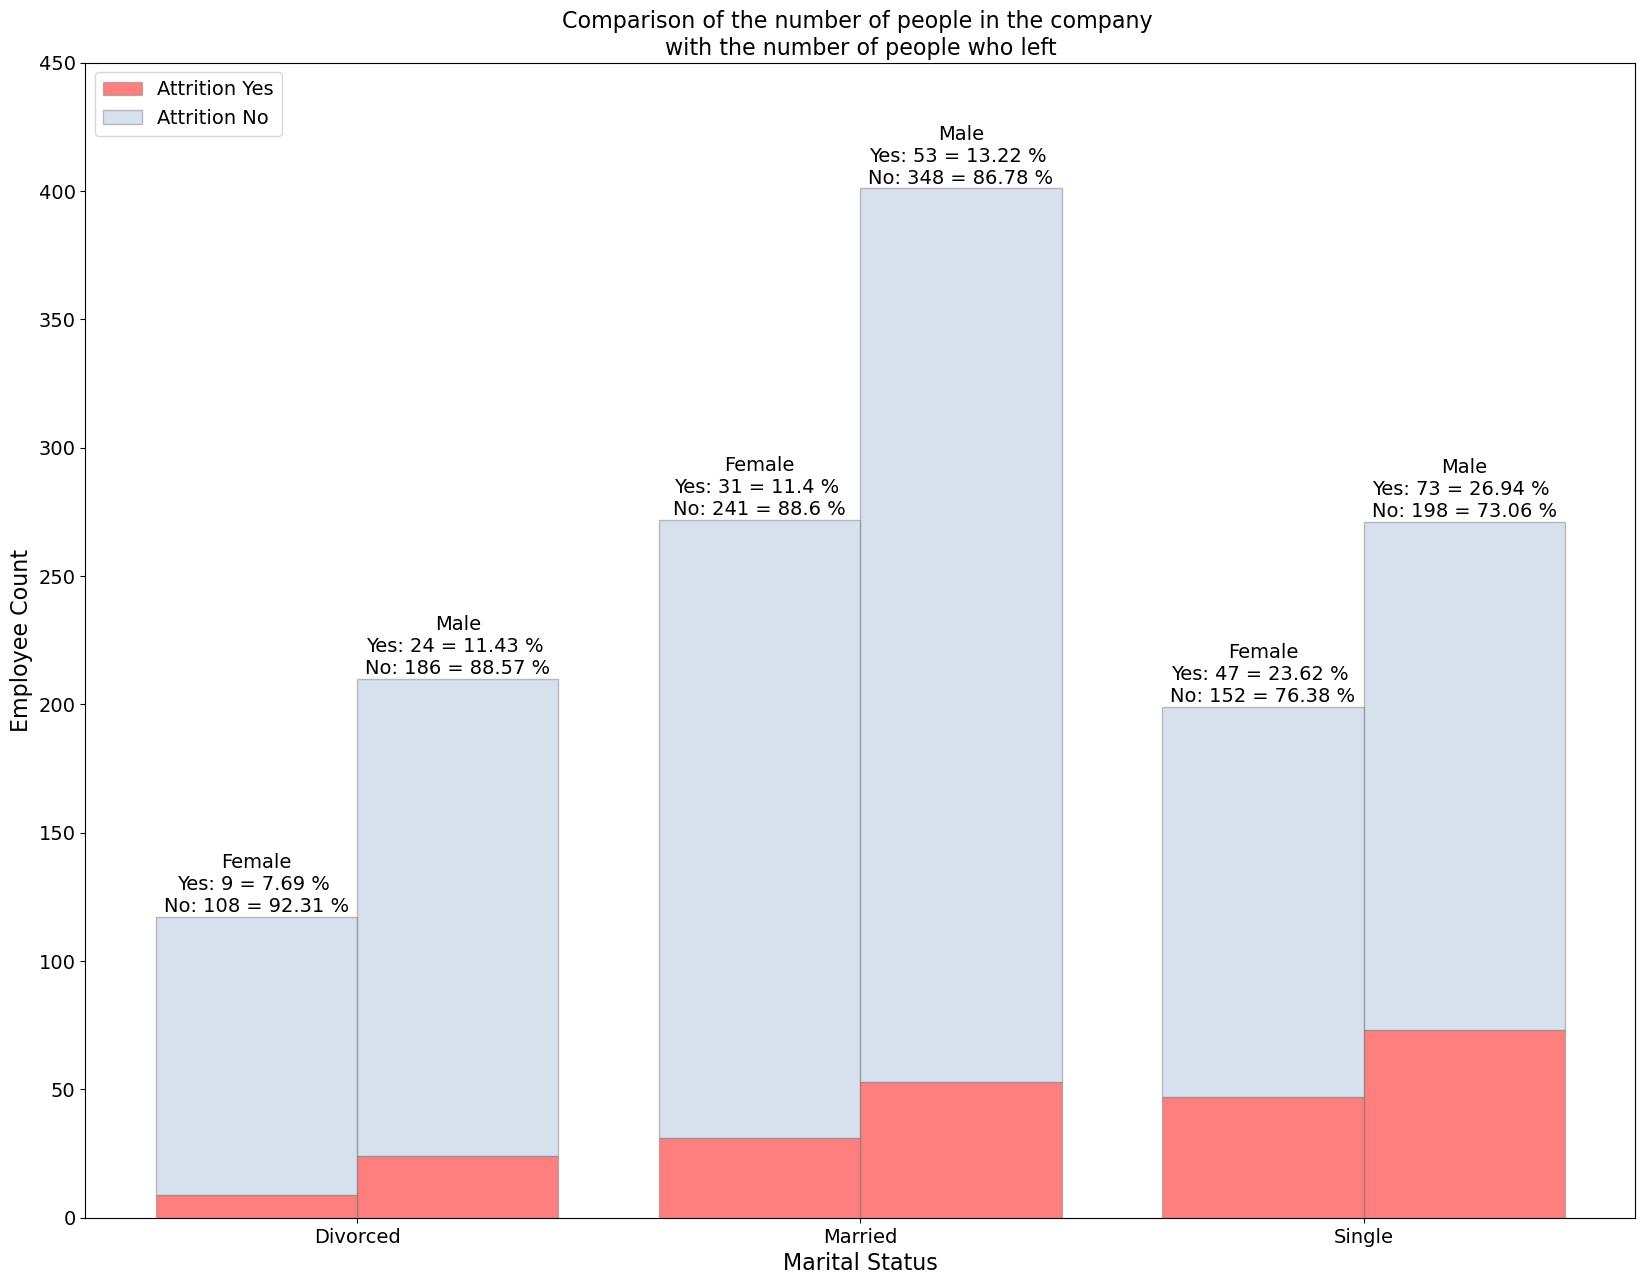

In [51]:
plt.figure(figsize=(20, 15))

# Get unique AgeCategories and Genders
genmar_categories = df_genmar_temp['MaritalStatus'].unique()
gendersmar = df_genmar_temp['Gender'].unique()

# Set width of bar
bar_width_mar = 0.4

# Set position of bar on X axis
r = np.arange(len(genmar_categories))

# Plot
fig, ax = plt.subplots(figsize=(20, 15))

# Iterate over Genders
for i, gendermar in enumerate(gendersmar):
    # Get data for the current Gender
    gender_datamar = df_genmar_temp[df_genmar_temp['Gender'] == gendermar]
    
    # Calculate the position of the bars for the current Gender
    bar_position_mar = r + (i - 0.5) * bar_width_mar + (len(gendersmar) * bar_width_mar / 2)
    
    # Create bars for 'AttYes' and 'AttNo' for each Gender
    ax.bar(bar_position_mar, gender_datamar['AttYes'], color='r', alpha = 0.5, width=bar_width_mar, edgecolor='grey', label='Attrition Yes' if i == 0 else None)
    ax.bar(bar_position_mar, gender_datamar['AttNo'], color='lightsteelblue', alpha = 0.5, width=bar_width_mar, edgecolor='grey', bottom=gender_datamar['AttYes'], label='Attrition No' if i == 0 else None)
    
    # Add labels for subcategories
    for j, value in enumerate(gender_datamar['AttYes'] + gender_datamar['AttNo']):
        ax.text(bar_position_mar[j], value + 2, f'{gendermar}\nYes: {gender_datamar.iloc[j]["AttYes"]} = {gender_datamar.iloc[j]["AttYesPerc"]} % \nNo: {gender_datamar.iloc[j]["AttNo"]} = {gender_datamar.iloc[j]["AttNoPerc"]} %', ha='center', fontsize=14)

# Add xticks on the middle of the group bars
plt.xlabel('Marital Status', fontsize=16)
plt.ylabel('Employee Count', fontsize=16)
plt.title('Comparison of the number of people in the company \nwith the number of people who left', fontsize=16)
plt.xticks(r + (bar_width_mar * len(gendersmar) / 2), genmar_categories, fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0, 450)
plt.legend(loc='upper left', fontsize=14)


# Show plot
plt.show()

Widac ze single znacznie częściej odchodzą niż osoby żonate lub rozwiedzione.

Co ciekawe, najrzadziej procentowo odchodzą rozwódki - mniej niż 8 %

### Distance from home

In [52]:
((df_personal['DistanceFromHome'].value_counts()/df_personal['DistanceFromHome'].value_counts().sum())*100)

DistanceFromHome
2     14.353741
1     14.149660
10     5.850340
9      5.782313
3      5.714286
7      5.714286
8      5.442177
5      4.421769
4      4.353741
6      4.013605
16     2.176871
11     1.972789
24     1.904762
23     1.836735
29     1.836735
15     1.768707
18     1.768707
26     1.700680
25     1.700680
20     1.700680
28     1.564626
19     1.496599
14     1.428571
12     1.360544
17     1.360544
22     1.292517
13     1.292517
21     1.224490
27     0.816327
Name: count, dtype: float64

Podzielmy to na categorie

In [53]:
df_personal['DistanceFromHome'].mean()

9.19251700680272

In [54]:
df_personal_attyes = df_personal[df_personal['Attrition'] == 'Yes']

In [55]:
df_personal_attyes['DistanceFromHome'].mean()

10.632911392405063

Srednia pracownikow ktorzy sie zwolnili jest wyzsza niz srednia pracownikow w firmie.

In [56]:
bins_dist = [1, 10, 20, 30]

# Define the labels for the distance categories
labels_dist = ['1-9', '10-19', '20-29']
df_personal["DistanceCategory"] = pd.cut(df_personal['DistanceFromHome'], bins=bins_dist, labels=labels_dist, right=False)
df_personal.head(10)

,Attrition,EmployeeCount,Age,Gender,MaritalStatus,Education,EducationField,BusinessTravel,DistanceFromHome,NumCompaniesWorked,TotalWorkingYears,YearsAtCompany,OverTime,WorkLifeBalance,RelationshipSatisfaction,AgeCategory,DistanceCategory
0,Yes,1,41,Female,Single,2,Life Sciences,Travel_Rarely,1,8,8,6,Yes,1,1,40-49,1-9
1,No,1,49,Male,Married,1,Life Sciences,Travel_Frequently,8,1,10,10,No,3,4,40-49,1-9
2,Yes,1,37,Male,Single,2,Other,Travel_Rarely,2,6,7,0,Yes,3,2,30-39,1-9
3,No,1,33,Female,Married,4,Life Sciences,Travel_Frequently,3,1,8,8,Yes,3,3,30-39,1-9
4,No,1,27,Male,Married,1,Medical,Travel_Rarely,2,9,6,2,No,3,4,22-29,1-9
5,No,1,32,Male,Single,2,Life Sciences,Travel_Frequently,2,0,8,7,No,2,3,30-39,1-9
6,No,1,59,Female,Married,3,Medical,Travel_Rarely,3,4,12,1,Yes,2,1,50-60,1-9
7,No,1,30,Male,Divorced,1,Life Sciences,Travel_Rarely,24,1,1,1,No,3,2,30-39,20-29
8,No,1,38,Male,Single,3,Life Sciences,Travel_Frequently,23,0,10,9,No,3,2,30-39,20-29
9,No,1,36,Male,Married,3,Medical,Travel_Rarely,27,6,17,7,No,2,2,30-39,20-29


In [57]:
((df_personal['DistanceCategory'].value_counts()/df_personal['DistanceCategory'].value_counts().sum())*100)

DistanceCategory
1-9      63.945578
10-19    20.476190
20-29    15.578231
Name: count, dtype: float64

In [58]:
(df_personal[['DistanceCategory', 'Attrition']].value_counts()/len(df_personal))*100

DistanceCategory  Attrition
1-9               No           54.897959
10-19             No           16.734694
20-29             No           12.244898
1-9               Yes           9.047619
10-19             Yes           3.741497
20-29             Yes           3.333333
Name: count, dtype: float64

In [59]:
df_personal[['AgeCategory', 'Gender', 'DistanceCategory', 'Attrition']].value_counts().reset_index(name='count')

,AgeCategory,Gender,DistanceCategory,Attrition,count
0,30-39,Male,1-9,No,207
1,30-39,Female,1-9,No,143
2,40-49,Male,1-9,No,123
3,22-29,Male,1-9,No,88
4,40-49,Female,1-9,No,84
5,30-39,Male,10-19,No,70
6,50-60,Male,1-9,No,57
7,22-29,Female,1-9,No,48
8,30-39,Female,10-19,No,46
9,50-60,Female,1-9,No,44


In [60]:
df_agegendist_temp = df_personal.groupby(['AgeCategory', 'Gender', 'DistanceCategory'])['AgeCategory'].value_counts().reset_index(name='Sum')
df_agegendist_temp = df_agegendist_temp[df_agegendist_temp['Sum'] != 0]
df_agegendist_temp

C:\Users\mierz\AppData\Local\Temp\ipykernel_11560\2664699865.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_agegendist_temp = df_personal.groupby(['AgeCategory', 'Gender', 'DistanceCategory'])['AgeCategory'].value_counts().reset_index(name='Sum')


,AgeCategory,Gender,DistanceCategory,Sum
0,18-21,Female,1-9,11
1,18-21,Female,10-19,8
2,18-21,Female,20-29,1
3,18-21,Male,1-9,15
4,18-21,Male,10-19,2
5,18-21,Male,20-29,4
6,22-29,Female,1-9,59
7,22-29,Female,10-19,23
8,22-29,Female,20-29,18
9,22-29,Male,1-9,117


In [61]:
attrition_counts_dist = df_personal.groupby(['AgeCategory', 'Gender', 'DistanceCategory'])['Attrition'].value_counts().unstack(fill_value=0)

attrition_counts_dist.columns = ['AttNo', 'AttYes']

attrition_counts_dist

C:\Users\mierz\AppData\Local\Temp\ipykernel_11560\1861931777.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  attrition_counts_dist = df_personal.groupby(['AgeCategory', 'Gender', 'DistanceCategory'])['Attrition'].value_counts().unstack(fill_value=0)


AttNo  AttYes
AgeCategory Gender DistanceCategory               
18-21       Female 1-9                   5       6
                   10-19                 2       6
                   20-29                 1       0
            Male   1-9                   8       7
                   10-19                 1       1
                   20-29                 2       2
22-29       Female 1-9                  48      11
                   10-19                15       8
                   20-29                13       5
            Male   1-9                  88      29
                   10-19                34       5
                   20-29                18      11
30-39       Female 1-9                 143      19
                   10-19                46       6
                   20-29                30       7
            Male   1-9                 207      28
                   10-19                70      19
                   20-29                37      10
40-49       Female 1-9                  84       5
                   10-19                23       4
                   20-29                23       5
            Male   1-9                 123      11
                   10-19                33       4
                   20-29                29       5
50-60       Female 1-9                  44       3
                   10-19                13       1
                   20-29                11       1
            Male   1-9                  57      14
                   10-19                 9       1
                   20-29                16       3

In [62]:
df_agegendist_temp = df_agegendist_temp.merge(attrition_counts_dist, how='left', on=['AgeCategory', 'Gender', 'DistanceCategory'])

df_agegendist_temp

,AgeCategory,Gender,DistanceCategory,Sum,AttNo,AttYes
0,18-21,Female,1-9,11,5,6
1,18-21,Female,10-19,8,2,6
2,18-21,Female,20-29,1,1,0
3,18-21,Male,1-9,15,8,7
4,18-21,Male,10-19,2,1,1
5,18-21,Male,20-29,4,2,2
6,22-29,Female,1-9,59,48,11
7,22-29,Female,10-19,23,15,8
8,22-29,Female,20-29,18,13,5
9,22-29,Male,1-9,117,88,29


In [63]:
df_agegendist_temp['AttNoPerc'] = (df_agegendist_temp['AttNo'] / df_agegendist_temp['Sum'] * 100).round(2)
df_agegendist_temp['AttYesPerc'] = (df_agegendist_temp['AttYes'] / df_agegendist_temp['Sum'] * 100).round(2)
df_agegendist_temp.sort_values('AttYesPerc')

,AgeCategory,Gender,DistanceCategory,Sum,AttNo,AttYes,AttNoPerc,AttYesPerc
2,18-21,Female,20-29,1,1,0,100.00,0.00
18,40-49,Female,1-9,89,84,5,94.38,5.62
24,50-60,Female,1-9,47,44,3,93.62,6.38
25,50-60,Female,10-19,14,13,1,92.86,7.14
21,40-49,Male,1-9,134,123,11,91.79,8.21
26,50-60,Female,20-29,12,11,1,91.67,8.33
28,50-60,Male,10-19,10,9,1,90.00,10.00
22,40-49,Male,10-19,37,33,4,89.19,10.81
13,30-39,Female,10-19,52,46,6,88.46,11.54
12,30-39,Female,1-9,162,143,19,88.27,11.73


In [64]:
#df_agegendist_temp.to_csv('agegenderdistanceattrition.csv', index=False)

Nie ma bardzo duzych roznice jesli dokladamy dodadkowy wspolczynnik jakim jest odleglosc pracy od domu.

Mozna wywnioskowac ze wiek i plec maja wiekszy wplyw na zwolnienia

In [65]:
df_dist_temp = df_personal.groupby(['DistanceCategory', 'EmployeeCount'])['DistanceCategory'].value_counts().reset_index(name='Sum')
df_dist_temp

C:\Users\mierz\AppData\Local\Temp\ipykernel_11560\581240458.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_dist_temp = df_personal.groupby(['DistanceCategory', 'EmployeeCount'])['DistanceCategory'].value_counts().reset_index(name='Sum')


,DistanceCategory,EmployeeCount,Sum
0,1-9,1,940
1,10-19,1,301
2,20-29,1,229


In [66]:
att_counts_dist = df_personal.groupby(['DistanceCategory', 'EmployeeCount'])['Attrition'].value_counts().unstack(fill_value=0)

att_counts_dist.columns = ['AttNo', 'AttYes']

att_counts_dist

C:\Users\mierz\AppData\Local\Temp\ipykernel_11560\2229038168.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  att_counts_dist = df_personal.groupby(['DistanceCategory', 'EmployeeCount'])['Attrition'].value_counts().unstack(fill_value=0)


,,AttNo,AttYes
DistanceCategory,EmployeeCount,,
1-9,1,807,133
10-19,1,246,55
20-29,1,180,49


In [67]:
df_dist_temp = df_dist_temp.merge(att_counts_dist, how='left', on=['DistanceCategory'])

df_dist_temp

,DistanceCategory,EmployeeCount,Sum,AttNo,AttYes
0,1-9,1,940,807,133
1,10-19,1,301,246,55
2,20-29,1,229,180,49


In [68]:
df_dist_temp['AttNoPerc'] = (df_dist_temp['AttNo'] / df_dist_temp['Sum'] * 100).round(2)
df_dist_temp['AttYesPerc'] = (df_dist_temp['AttYes'] / df_dist_temp['Sum'] * 100).round(2)
df_dist_temp.sort_values('AttYesPerc')

,DistanceCategory,EmployeeCount,Sum,AttNo,AttYes,AttNoPerc,AttYesPerc
0,1-9,1,940,807,133,85.85,14.15
1,10-19,1,301,246,55,81.73,18.27
2,20-29,1,229,180,49,78.60,21.40


czesciej zwalniaja sie osoby co maja dalej. ALe nie ma duzej roznicy. 

### Work Travel

In [69]:
(df_personal[['BusinessTravel']].value_counts()/len(df_personal))*100

BusinessTravel   
Travel_Rarely        70.952381
Travel_Frequently    18.843537
Non-Travel           10.204082
Name: count, dtype: float64

In [70]:
(df_personal[['BusinessTravel', 'Attrition']].value_counts()/len(df_personal))*100

BusinessTravel     Attrition
Travel_Rarely      No           60.340136
Travel_Frequently  No           14.149660
Travel_Rarely      Yes          10.612245
Non-Travel         No            9.387755
Travel_Frequently  Yes           4.693878
Non-Travel         Yes           0.816327
Name: count, dtype: float64

In [71]:
(df_personal[['Gender', 'BusinessTravel', 'Attrition']].value_counts()/len(df_personal))*100

Gender  BusinessTravel     Attrition
Male    Travel_Rarely      No           35.306122
Female  Travel_Rarely      No           25.034014
Male    Travel_Frequently  No            8.231293
        Travel_Rarely      Yes           6.938776
        Non-Travel         No            6.258503
Female  Travel_Frequently  No            5.918367
        Travel_Rarely      Yes           3.673469
        Non-Travel         No            3.129252
Male    Travel_Frequently  Yes           2.653061
Female  Travel_Frequently  Yes           2.040816
Male    Non-Travel         Yes           0.612245
Female  Non-Travel         Yes           0.204082
Name: count, dtype: float64

In [72]:
df_personal[['AgeCategory', 'Gender', 'BusinessTravel', 'Attrition']].value_counts().reset_index(name='count')

,AgeCategory,Gender,BusinessTravel,Attrition,count
0,30-39,Male,Travel_Rarely,No,215
1,30-39,Female,Travel_Rarely,No,154
2,40-49,Male,Travel_Rarely,No,127
3,22-29,Male,Travel_Rarely,No,103
4,40-49,Female,Travel_Rarely,No,99
5,50-60,Male,Travel_Rarely,No,65
6,30-39,Male,Travel_Frequently,No,62
7,22-29,Female,Travel_Rarely,No,60
8,50-60,Female,Travel_Rarely,No,49
9,30-39,Male,Travel_Rarely,Yes,40


In [73]:
df_agegenbt_temp = df_personal.groupby(['AgeCategory', 'Gender', 'BusinessTravel'])['AgeCategory'].value_counts().reset_index(name='Sum')
df_agegenbt_temp = df_agegenbt_temp[df_agegenbt_temp['Sum'] != 0]
df_agegenbt_temp

C:\Users\mierz\AppData\Local\Temp\ipykernel_11560\3912116585.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_agegenbt_temp = df_personal.groupby(['AgeCategory', 'Gender', 'BusinessTravel'])['AgeCategory'].value_counts().reset_index(name='Sum')


,AgeCategory,Gender,BusinessTravel,Sum
0,18-21,Female,Non-Travel,3
1,18-21,Female,Travel_Frequently,6
2,18-21,Female,Travel_Rarely,11
3,18-21,Male,Non-Travel,3
4,18-21,Male,Travel_Frequently,1
5,18-21,Male,Travel_Rarely,17
6,22-29,Female,Non-Travel,4
7,22-29,Female,Travel_Frequently,18
8,22-29,Female,Travel_Rarely,78
9,22-29,Male,Non-Travel,17


In [74]:
attrition_counts_bt = df_personal.groupby(['AgeCategory', 'Gender', 'BusinessTravel'])['Attrition'].value_counts().unstack(fill_value=0)

attrition_counts_bt.columns = ['AttNo', 'AttYes']

attrition_counts_bt

C:\Users\mierz\AppData\Local\Temp\ipykernel_11560\1562203451.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  attrition_counts_bt = df_personal.groupby(['AgeCategory', 'Gender', 'BusinessTravel'])['Attrition'].value_counts().unstack(fill_value=0)


AttNo  AttYes
AgeCategory Gender BusinessTravel                  
18-21       Female Non-Travel             2       1
                   Travel_Frequently      0       6
                   Travel_Rarely          6       5
            Male   Non-Travel             2       1
                   Travel_Frequently      0       1
                   Travel_Rarely          9       8
22-29       Female Non-Travel             4       0
                   Travel_Frequently     12       6
                   Travel_Rarely         60      18
            Male   Non-Travel            15       2
                   Travel_Frequently     22      12
                   Travel_Rarely        103      31
30-39       Female Non-Travel            28       1
                   Travel_Frequently     37      15
                   Travel_Rarely        154      16
            Male   Non-Travel            37       4
                   Travel_Frequently     62      13
                   Travel_Rarely        215      40
40-49       Female Non-Travel             8       1
                   Travel_Frequently     23       3
                   Travel_Rarely         99      10
            Male   Non-Travel            29       2
                   Travel_Frequently     29       8
                   Travel_Rarely        127      10
50-60       Female Non-Travel             4       0
                   Travel_Frequently     15       0
                   Travel_Rarely         49       5
            Male   Non-Travel             9       0
                   Travel_Frequently      8       5
                   Travel_Rarely         65      13

In [75]:
df_agegenbt_temp = df_agegenbt_temp.merge(attrition_counts_bt, how='left', on=['AgeCategory', 'Gender', 'BusinessTravel'])

df_agegenbt_temp

,AgeCategory,Gender,BusinessTravel,Sum,AttNo,AttYes
0,18-21,Female,Non-Travel,3,2,1
1,18-21,Female,Travel_Frequently,6,0,6
2,18-21,Female,Travel_Rarely,11,6,5
3,18-21,Male,Non-Travel,3,2,1
4,18-21,Male,Travel_Frequently,1,0,1
5,18-21,Male,Travel_Rarely,17,9,8
6,22-29,Female,Non-Travel,4,4,0
7,22-29,Female,Travel_Frequently,18,12,6
8,22-29,Female,Travel_Rarely,78,60,18
9,22-29,Male,Non-Travel,17,15,2


In [76]:
df_agegenbt_temp['AttNoPerc'] = (df_agegenbt_temp['AttNo'] / df_agegenbt_temp['Sum'] * 100).round(2)
df_agegenbt_temp['AttYesPerc'] = (df_agegenbt_temp['AttYes'] / df_agegenbt_temp['Sum'] * 100).round(2)
df_agegenbt_temp.sort_values('AttYesPerc')

,AgeCategory,Gender,BusinessTravel,Sum,AttNo,AttYes,AttNoPerc,AttYesPerc
27,50-60,Male,Non-Travel,9,9,0,100.00,0.00
25,50-60,Female,Travel_Frequently,15,15,0,100.00,0.00
24,50-60,Female,Non-Travel,4,4,0,100.00,0.00
6,22-29,Female,Non-Travel,4,4,0,100.00,0.00
12,30-39,Female,Non-Travel,29,28,1,96.55,3.45
21,40-49,Male,Non-Travel,31,29,2,93.55,6.45
23,40-49,Male,Travel_Rarely,137,127,10,92.70,7.30
20,40-49,Female,Travel_Rarely,109,99,10,90.83,9.17
26,50-60,Female,Travel_Rarely,54,49,5,90.74,9.26
14,30-39,Female,Travel_Rarely,170,154,16,90.59,9.41


In [77]:
df_agegenbt_temp.to_csv('agegenderbtattrition.csv', index=False)

Czy same podroze firmowe moga wplywac na zwolneinia

In [78]:
df_bt_temp = df_personal.groupby(['BusinessTravel'])['BusinessTravel'].value_counts().reset_index(name='Sum')
df_bt_temp = df_bt_temp[df_agegenbt_temp['Sum'] != 0]
df_bt_temp

C:\Users\mierz\AppData\Local\Temp\ipykernel_11560\2633746923.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_bt_temp = df_bt_temp[df_agegenbt_temp['Sum'] != 0]


,BusinessTravel,Sum
0,Non-Travel,150
1,Travel_Frequently,277
2,Travel_Rarely,1043


In [79]:
att_counts_bt = df_personal.groupby(['BusinessTravel'])['Attrition'].value_counts().unstack(fill_value=0)

att_counts_bt.columns = ['AttNo', 'AttYes']

att_counts_bt

,AttNo,AttYes
BusinessTravel,,
Non-Travel,138,12
Travel_Frequently,208,69
Travel_Rarely,887,156


In [80]:
df_bt_temp = df_bt_temp.merge(att_counts_bt, how='left', on=['BusinessTravel'])

df_bt_temp

,BusinessTravel,Sum,AttNo,AttYes
0,Non-Travel,150,138,12
1,Travel_Frequently,277,208,69
2,Travel_Rarely,1043,887,156


In [81]:
df_bt_temp['AttNoPerc'] = (df_bt_temp['AttNo'] / df_bt_temp['Sum'] * 100).round(2)
df_bt_temp['AttYesPerc'] = (df_bt_temp['AttYes'] / df_bt_temp['Sum'] * 100).round(2)
df_bt_temp.sort_values('AttYesPerc')

,BusinessTravel,Sum,AttNo,AttYes,AttNoPerc,AttYesPerc
0,Non-Travel,150,138,12,92.00,8.00
2,Travel_Rarely,1043,887,156,85.04,14.96
1,Travel_Frequently,277,208,69,75.09,24.91


Osoby, ktore musza czesto podrozowac zwalniaja sie ponad 3 razy czesciej niz osoby ktore nie podrozuja

### Edukacja

In [82]:
(df_personal['Education'].value_counts()/df_personal['Education'].value_counts().sum())*100

Education
3    38.911565
4    27.074830
2    19.183673
1    11.564626
5     3.265306
Name: count, dtype: float64

In [83]:
value_mapping = {1: 'Below College', 2:'College', 3: 'Bachelor', 4: 'Master', 5: 'Doctor'}
df_personal['Education'] = df_personal['Education'].replace(value_mapping)

In [84]:
#df_personal.to_csv('df_personal.csv', index=False)

In [85]:
(df_personal['Education'].value_counts()/df_personal['Education'].value_counts().sum())*100

Education
Bachelor         38.911565
Master           27.074830
College          19.183673
Below College    11.564626
Doctor            3.265306
Name: count, dtype: float64

In [86]:
(df_personal[['Education', 'Attrition']].value_counts()/df_personal['Education'].value_counts().sum())*100

Education      Attrition
Bachelor       No           32.176871
Master         No           23.129252
College        No           16.190476
Below College  No            9.455782
Bachelor       Yes           6.734694
Master         Yes           3.945578
College        Yes           2.993197
Doctor         No            2.925170
Below College  Yes           2.108844
Doctor         Yes           0.340136
Name: count, dtype: float64

In [87]:
(df_personal[['Education', 'Gender']].value_counts()/df_personal['Education'].value_counts().sum())*100

Education      Gender
Bachelor       Male      22.925170
Master         Male      16.598639
Bachelor       Female    15.986395
College        Male      11.224490
Master         Female    10.476190
College        Female     7.959184
Below College  Male       7.482993
               Female     4.081633
Doctor         Male       1.768707
               Female     1.496599
Name: count, dtype: float64

In [88]:
(df_personal[['Education', 'EducationField']].value_counts()/df_personal['Education'].value_counts().sum())*100

Education      EducationField  
Bachelor       Life Sciences       15.850340
               Medical             12.448980
Master         Life Sciences       11.768707
College        Life Sciences        7.891156
Master         Medical              7.074830
College        Medical              6.734694
Below College  Life Sciences        4.557823
               Medical              4.285714
Bachelor       Marketing            4.013605
               Technical Degree     3.877551
Master         Marketing            3.537415
               Other                2.244898
               Technical Degree     2.108844
College        Marketing            1.632653
Bachelor       Other                1.632653
College        Technical Degree     1.496599
Below College  Technical Degree     1.292517
College        Other                1.292517
Doctor         Life Sciences        1.156463
Bachelor       Human Resources      1.088435
Doctor         Medical              1.020408
Below College  Marketin

In [89]:
df_agegenedu_temp = df_personal.groupby(['Education', 'EducationField', 'Gender'])['Education'].value_counts().reset_index(name='Sum')
df_agegenedu_temp = df_agegenedu_temp[df_agegenedu_temp['Sum'] != 0]
df_agegenedu_temp

,Education,EducationField,Gender,Sum
0,Bachelor,Human Resources,Female,7
1,Bachelor,Human Resources,Male,9
2,Bachelor,Life Sciences,Female,90
3,Bachelor,Life Sciences,Male,143
4,Bachelor,Marketing,Female,29
5,Bachelor,Marketing,Male,30
6,Bachelor,Medical,Female,78
7,Bachelor,Medical,Male,105
8,Bachelor,Other,Female,7
9,Bachelor,Other,Male,17


In [90]:
attrition_counts_edu = df_personal.groupby(['Education', 'EducationField', 'Gender'])['Attrition'].value_counts().unstack(fill_value=0)

attrition_counts_edu.columns = ['AttNo', 'AttYes']

attrition_counts_edu

AttNo  AttYes
Education     EducationField   Gender               
Bachelor      Human Resources  Female      4       3
                               Male        8       1
              Life Sciences    Female     74      16
                               Male      122      21
              Marketing        Female     21       8
                               Male       23       7
              Medical          Female     71       7
                               Male       87      18
              Other            Female      7       0
                               Male       15       2
              Technical Degree Female     20       4
                               Male       21      12
Below College Human Resources  Male        1       1
              Life Sciences    Female     18       4
                               Male       41       4
              Marketing        Female      3       1
                               Male        7       3
              Medical          Female     23       1
                               Male       30       9
              Other            Female      1       2
                               Male        2       0
              Technical Degree Female      4       3
                               Male        9       3
College       Human Resources  Male        2       0
              Life Sciences    Female     38       9
                               Male       60       9
              Marketing        Female      8       3
                               Male       10       3
              Medical          Female     36       7
                               Male       48       8
              Other            Female      9       0
                               Male        9       1
              Technical Degree Female      7       0
                               Male       11       4
Doctor        Human Resources  Male        1       1
              Life Sciences    Female      7       1
                               Male        9       0
              Marketing        Female      4       0
                               Male        5       1
              Medical          Female      7       0
                               Male        8       0
              Other            Male        1       0
              Technical Degree Female      1       2
Master        Human Resources  Female      1       0
                               Male        3       1
              Life Sciences    Female     65       8
                               Male       83      17
              Marketing        Female     18       3
                               Male       25       6
              Medical          Female     34       4
                               Male       57       9
              Other            Female     10       0
                               Male       17       6
              Technical Degree Female     10       1
                               Male       17       3

In [91]:
df_agegenedu_temp = df_agegenedu_temp.merge(attrition_counts_edu, how='left', on=['Education', 'EducationField', 'Gender'])

df_agegenedu_temp

,Education,EducationField,Gender,Sum,AttNo,AttYes
0,Bachelor,Human Resources,Female,7,4,3
1,Bachelor,Human Resources,Male,9,8,1
2,Bachelor,Life Sciences,Female,90,74,16
3,Bachelor,Life Sciences,Male,143,122,21
4,Bachelor,Marketing,Female,29,21,8
5,Bachelor,Marketing,Male,30,23,7
6,Bachelor,Medical,Female,78,71,7
7,Bachelor,Medical,Male,105,87,18
8,Bachelor,Other,Female,7,7,0
9,Bachelor,Other,Male,17,15,2


In [92]:
df_agegenedu_temp['AttNoPerc'] = (df_agegenedu_temp['AttNo'] / df_agegenedu_temp['Sum'] * 100).round(2)
df_agegenedu_temp['AttYesPerc'] = (df_agegenedu_temp['AttYes'] / df_agegenedu_temp['Sum'] * 100).round(2)
df_agegenedu_temp.sort_values('AttYesPerc')

,Education,EducationField,Gender,Sum,AttNo,AttYes,AttNoPerc,AttYesPerc
36,Doctor,Life Sciences,Male,9,9,0,100.00,0.00
20,Below College,Other,Male,2,2,0,100.00,0.00
41,Doctor,Other,Male,1,1,0,100.00,0.00
40,Doctor,Medical,Male,8,8,0,100.00,0.00
23,College,Human Resources,Male,2,2,0,100.00,0.00
39,Doctor,Medical,Female,7,7,0,100.00,0.00
43,Master,Human Resources,Female,1,1,0,100.00,0.00
8,Bachelor,Other,Female,7,7,0,100.00,0.00
30,College,Other,Female,9,9,0,100.00,0.00
51,Master,Other,Female,10,10,0,100.00,0.00


In [93]:
df_edu_temp = df_personal.groupby(['Education', 'EducationField'])['Education'].value_counts().reset_index(name='Sum')
df_edu_temp = df_edu_temp[df_edu_temp['Sum'] != 0]
df_edu_temp

,Education,EducationField,Sum
0,Bachelor,Human Resources,16
1,Bachelor,Life Sciences,233
2,Bachelor,Marketing,59
3,Bachelor,Medical,183
4,Bachelor,Other,24
5,Bachelor,Technical Degree,57
6,Below College,Human Resources,2
7,Below College,Life Sciences,67
8,Below College,Marketing,14
9,Below College,Medical,63


In [94]:
att_counts_edu = df_personal.groupby(['Education', 'EducationField'])['Attrition'].value_counts().unstack(fill_value=0)

att_counts_edu.columns = ['AttNo', 'AttYes']

att_counts_edu

AttNo  AttYes
Education     EducationField                 
Bachelor      Human Resources      12       4
              Life Sciences       196      37
              Marketing            44      15
              Medical             158      25
              Other                22       2
              Technical Degree     41      16
Below College Human Resources       1       1
              Life Sciences        59       8
              Marketing            10       4
              Medical              53      10
              Other                 3       2
              Technical Degree     13       6
College       Human Resources       2       0
              Life Sciences        98      18
              Marketing            18       6
              Medical              84      15
              Other                18       1
              Technical Degree     18       4
Doctor        Human Resources       1       1
              Life Sciences        16       1
              Marketing             9       1
              Medical              15       0
              Other                 1       0
              Technical Degree      1       2
Master        Human Resources       4       1
              Life Sciences       148      25
              Marketing            43       9
              Medical              91      13
              Other                27       6
              Technical Degree     27       4

In [95]:
df_edu_temp = df_edu_temp.merge(att_counts_edu, how='left', on=['Education', 'EducationField'])

df_edu_temp

,Education,EducationField,Sum,AttNo,AttYes
0,Bachelor,Human Resources,16,12,4
1,Bachelor,Life Sciences,233,196,37
2,Bachelor,Marketing,59,44,15
3,Bachelor,Medical,183,158,25
4,Bachelor,Other,24,22,2
5,Bachelor,Technical Degree,57,41,16
6,Below College,Human Resources,2,1,1
7,Below College,Life Sciences,67,59,8
8,Below College,Marketing,14,10,4
9,Below College,Medical,63,53,10


In [96]:
df_edu_temp['AttNoPerc'] = (df_edu_temp['AttNo'] / df_edu_temp['Sum'] * 100).round(2)
df_edu_temp['AttYesPerc'] = (df_edu_temp['AttYes'] / df_edu_temp['Sum'] * 100).round(2)
df_edu_temp.sort_values('AttYesPerc')

,Education,EducationField,Sum,AttNo,AttYes,AttNoPerc,AttYesPerc
12,College,Human Resources,2,2,0,100.00,0.00
21,Doctor,Medical,15,15,0,100.00,0.00
22,Doctor,Other,1,1,0,100.00,0.00
16,College,Other,19,18,1,94.74,5.26
19,Doctor,Life Sciences,17,16,1,94.12,5.88
4,Bachelor,Other,24,22,2,91.67,8.33
20,Doctor,Marketing,10,9,1,90.00,10.00
7,Below College,Life Sciences,67,59,8,88.06,11.94
27,Master,Medical,104,91,13,87.50,12.50
29,Master,Technical Degree,31,27,4,87.10,12.90


In [97]:
#df_edu_temp.to_csv('aeducationfieldandlevel.csv', index=False)

### Sam poziom edukacji

In [98]:
df_edulev_temp = df_personal.groupby(['Education'])['Education'].value_counts().reset_index(name='Sum')
df_edulev_temp = df_edulev_temp[df_edu_temp['Sum'] != 0]
df_edulev_temp

C:\Users\mierz\AppData\Local\Temp\ipykernel_11560\929269952.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_edulev_temp = df_edulev_temp[df_edu_temp['Sum'] != 0]


,Education,Sum
0,Bachelor,572
1,Below College,170
2,College,282
3,Doctor,48
4,Master,398


In [99]:
att_counts_edulev = df_personal.groupby(['Education'])['Attrition'].value_counts().unstack(fill_value=0)

att_counts_edulev.columns = ['AttNo', 'AttYes']

att_counts_edulev

,AttNo,AttYes
Education,,
Bachelor,473,99
Below College,139,31
College,238,44
Doctor,43,5
Master,340,58


In [100]:
df_edulev_temp = df_edulev_temp.merge(att_counts_edulev, how='left', on=['Education'])

df_edulev_temp

,Education,Sum,AttNo,AttYes
0,Bachelor,572,473,99
1,Below College,170,139,31
2,College,282,238,44
3,Doctor,48,43,5
4,Master,398,340,58


In [101]:
df_edulev_temp['AttNoPerc'] = (df_edulev_temp['AttNo'] / df_edulev_temp['Sum'] * 100).round(2)
df_edulev_temp['AttYesPerc'] = (df_edulev_temp['AttYes'] / df_edulev_temp['Sum'] * 100).round(2)
df_edulev_temp.sort_values('AttYesPerc')

,Education,Sum,AttNo,AttYes,AttNoPerc,AttYesPerc
3,Doctor,48,43,5,89.58,10.42
4,Master,398,340,58,85.43,14.57
2,College,282,238,44,84.40,15.60
0,Bachelor,572,473,99,82.69,17.31
1,Below College,170,139,31,81.76,18.24


Czesciej zwalniaja sie osoby z nizszym wyksztalceniem ale roznica jest mala miedzy magistrem, ktorych jest naprawde duzo - a ludzmi bez wyzszego wyksztalcenia je mniej niz 3 % procent roznicy

### Education field

In [102]:
df_edufield_temp = df_personal.groupby(['EducationField'])['EducationField'].value_counts().reset_index(name='Sum')
df_edufield_temp = df_edufield_temp[df_edufield_temp['Sum'] != 0]
df_edufield_temp

,EducationField,Sum
0,Human Resources,27
1,Life Sciences,606
2,Marketing,159
3,Medical,464
4,Other,82
5,Technical Degree,132


In [103]:
att_counts_edufield = df_personal.groupby(['EducationField'])['Attrition'].value_counts().unstack(fill_value=0)

att_counts_edufield.columns = ['AttNo', 'AttYes']

att_counts_edufield

,AttNo,AttYes
EducationField,,
Human Resources,20,7
Life Sciences,517,89
Marketing,124,35
Medical,401,63
Other,71,11
Technical Degree,100,32


In [104]:
df_edufield_temp = df_edufield_temp.merge(att_counts_edufield, how='left', on=['EducationField'])

df_edufield_temp

,EducationField,Sum,AttNo,AttYes
0,Human Resources,27,20,7
1,Life Sciences,606,517,89
2,Marketing,159,124,35
3,Medical,464,401,63
4,Other,82,71,11
5,Technical Degree,132,100,32


In [105]:
df_edufield_temp['AttNoPerc'] = (df_edufield_temp['AttNo'] / df_edufield_temp['Sum'] * 100).round(2)
df_edufield_temp['AttYesPerc'] = (df_edufield_temp['AttYes'] / df_edufield_temp['Sum'] * 100).round(2)
df_edufield_temp.sort_values('AttYesPerc')

,EducationField,Sum,AttNo,AttYes,AttNoPerc,AttYesPerc
4,Other,82,71,11,86.59,13.41
3,Medical,464,401,63,86.42,13.58
1,Life Sciences,606,517,89,85.31,14.69
2,Marketing,159,124,35,77.99,22.01
5,Technical Degree,132,100,32,75.76,24.24
0,Human Resources,27,20,7,74.07,25.93


Mozna zauwazyc roznice przy kierunku w jakim sa wyksztalceni ludzie. 

Marketing, Technical degree i Human resources zmieniaja prace najczesciej > 20%

### Past work experience

In [106]:
df_ncw_temp = df_personal.groupby(['NumCompaniesWorked'])['NumCompaniesWorked'].value_counts().reset_index(name='Sum')
df_ncw_temp 

,NumCompaniesWorked,Sum
0,0,197
1,1,521
2,2,146
3,3,159
4,4,139
5,5,63
6,6,70
7,7,74
8,8,49
9,9,52


In [107]:
att_counts_ncw = df_personal.groupby(['NumCompaniesWorked'])['Attrition'].value_counts().unstack(fill_value=0)

att_counts_ncw.columns = ['AttNo', 'AttYes']

att_counts_ncw

,AttNo,AttYes
NumCompaniesWorked,,
0,174,23
1,423,98
2,130,16
3,143,16
4,122,17
5,47,16
6,54,16
7,57,17
8,43,6


In [108]:
df_ncw_temp = df_ncw_temp.merge(att_counts_ncw, how='left', on=['NumCompaniesWorked'])

df_ncw_temp

,NumCompaniesWorked,Sum,AttNo,AttYes
0,0,197,174,23
1,1,521,423,98
2,2,146,130,16
3,3,159,143,16
4,4,139,122,17
5,5,63,47,16
6,6,70,54,16
7,7,74,57,17
8,8,49,43,6
9,9,52,40,12


In [109]:
df_ncw_temp['AttNoPerc'] = (df_ncw_temp['AttNo'] / df_ncw_temp['Sum'] * 100).round(2)
df_ncw_temp['AttYesPerc'] = (df_ncw_temp['AttYes'] / df_ncw_temp['Sum'] * 100).round(2)
df_ncw_temp.sort_values('AttYesPerc')

,NumCompaniesWorked,Sum,AttNo,AttYes,AttNoPerc,AttYesPerc
3,3,159,143,16,89.94,10.06
2,2,146,130,16,89.04,10.96
0,0,197,174,23,88.32,11.68
4,4,139,122,17,87.77,12.23
8,8,49,43,6,87.76,12.24
1,1,521,423,98,81.19,18.81
6,6,70,54,16,77.14,22.86
7,7,74,57,17,77.03,22.97
9,9,52,40,12,76.92,23.08
5,5,63,47,16,74.60,25.40


5,6,7, 9 - ponad 20% zwolnien

najwieksza grupa to ludzie co pracowali w 1 firmie i ich poziom zwolnien wynosi prawie 19 %

### Total working years

In [110]:
(df_personal['TotalWorkingYears'].value_counts()/df_personal['TotalWorkingYears'].value_counts().sum())*100

TotalWorkingYears
10    13.741497
6      8.503401
8      7.006803
9      6.530612
5      5.986395
7      5.510204
1      5.510204
4      4.285714
12     3.265306
3      2.857143
15     2.721088
16     2.517007
11     2.448980
13     2.448980
21     2.312925
17     2.244898
2      2.108844
14     2.108844
20     2.040816
18     1.836735
19     1.496599
23     1.496599
22     1.428571
24     1.224490
25     0.952381
28     0.952381
26     0.952381
0      0.748299
29     0.680272
31     0.612245
32     0.612245
30     0.476190
33     0.476190
27     0.476190
36     0.408163
34     0.340136
37     0.272109
35     0.204082
40     0.136054
38     0.068027
Name: count, dtype: float64

In [111]:
df_personal['TotalWorkingYears'].value_counts()

TotalWorkingYears
10    202
6     125
8     103
9      96
5      88
7      81
1      81
4      63
12     48
3      42
15     40
16     37
11     36
13     36
21     34
17     33
2      31
14     31
20     30
18     27
19     22
23     22
22     21
24     18
25     14
28     14
26     14
0      11
29     10
31      9
32      9
30      7
33      7
27      7
36      6
34      5
37      4
35      3
40      2
38      1
Name: count, dtype: int64

In [112]:
df_personal['TotalWorkingYears'].max()

40

In [113]:
df_personal['TotalWorkingYears'].min()

0

Sprawdzmy czy jest zaleznosc ilosci lat pracy (wieku pracownikow) a czestosci zmiany pracy.

Sprawdzimy tez czy osoby z najdluzszym stazem, czesciej zmieniaja prace?

Podzielimy lata pracy na kategorie 

In [114]:
bins_twy = [0, 6, 11, 21, 31, 41]

# Define the labels for the age categories
labels_twy = ['0-5', '6-10', '11-20', '21-30', '31-40']

df_personal["TWYCategory"] = pd.cut(df_personal['TotalWorkingYears'], bins=bins_twy, labels=labels_twy, right=False)
df_personal.head(10)

,Attrition,EmployeeCount,Age,Gender,MaritalStatus,Education,EducationField,BusinessTravel,DistanceFromHome,NumCompaniesWorked,TotalWorkingYears,YearsAtCompany,OverTime,WorkLifeBalance,RelationshipSatisfaction,AgeCategory,DistanceCategory,TWYCategory
0,Yes,1,41,Female,Single,College,Life Sciences,Travel_Rarely,1,8,8,6,Yes,1,1,40-49,1-9,6-10
1,No,1,49,Male,Married,Below College,Life Sciences,Travel_Frequently,8,1,10,10,No,3,4,40-49,1-9,6-10
2,Yes,1,37,Male,Single,College,Other,Travel_Rarely,2,6,7,0,Yes,3,2,30-39,1-9,6-10
3,No,1,33,Female,Married,Master,Life Sciences,Travel_Frequently,3,1,8,8,Yes,3,3,30-39,1-9,6-10
4,No,1,27,Male,Married,Below College,Medical,Travel_Rarely,2,9,6,2,No,3,4,22-29,1-9,6-10
5,No,1,32,Male,Single,College,Life Sciences,Travel_Frequently,2,0,8,7,No,2,3,30-39,1-9,6-10
6,No,1,59,Female,Married,Bachelor,Medical,Travel_Rarely,3,4,12,1,Yes,2,1,50-60,1-9,11-20
7,No,1,30,Male,Divorced,Below College,Life Sciences,Travel_Rarely,24,1,1,1,No,3,2,30-39,20-29,0-5
8,No,1,38,Male,Single,Bachelor,Life Sciences,Travel_Frequently,23,0,10,9,No,3,2,30-39,20-29,6-10
9,No,1,36,Male,Married,Bachelor,Medical,Travel_Rarely,27,6,17,7,No,2,2,30-39,20-29,11-20


In [115]:
df_twy_temp = df_personal.groupby(["TWYCategory", 'EmployeeCount'])["TWYCategory"].value_counts().reset_index(name='Sum')
df_twy_temp 

C:\Users\mierz\AppData\Local\Temp\ipykernel_11560\3118273720.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_twy_temp = df_personal.groupby(["TWYCategory", 'EmployeeCount'])["TWYCategory"].value_counts().reset_index(name='Sum')


,TWYCategory,EmployeeCount,Sum
0,0-5,1,316
1,6-10,1,607
2,11-20,1,340
3,21-30,1,161
4,31-40,1,46


In [116]:
correlation_matrix = df_personal[['Age', 'TotalWorkingYears', 'NumCompaniesWorked']].corr()

print(correlation_matrix)

                         Age  TotalWorkingYears  NumCompaniesWorked
Age                 1.000000           0.680381            0.299635
TotalWorkingYears   0.680381           1.000000            0.237639
NumCompaniesWorked  0.299635           0.237639            1.000000


Nie ma jakiejs mocnej korelacji miedzy iloscia firm dla ktorych pracownik pracowal a latami stazu

In [117]:
att_counts_twy = df_personal.groupby(['TWYCategory', 'EmployeeCount'])['Attrition'].value_counts().unstack(fill_value=0)

att_counts_twy.columns = ['AttNo', 'AttYes']

att_counts_twy

C:\Users\mierz\AppData\Local\Temp\ipykernel_11560\4225216546.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  att_counts_twy = df_personal.groupby(['TWYCategory', 'EmployeeCount'])['Attrition'].value_counts().unstack(fill_value=0)


,,AttNo,AttYes
TWYCategory,EmployeeCount,,
0-5,1,225,91
6-10,1,516,91
11-20,1,301,39
21-30,1,150,11
31-40,1,41,5


In [118]:
df_twy_temp = df_twy_temp.merge(att_counts_twy, how='left', on=['TWYCategory'])

df_twy_temp

,TWYCategory,EmployeeCount,Sum,AttNo,AttYes
0,0-5,1,316,225,91
1,6-10,1,607,516,91
2,11-20,1,340,301,39
3,21-30,1,161,150,11
4,31-40,1,46,41,5


In [119]:
df_twy_temp['AttNoPerc'] = (df_twy_temp['AttNo'] / df_twy_temp['Sum'] * 100).round(2)
df_twy_temp['AttYesPerc'] = (df_twy_temp['AttYes'] / df_twy_temp['Sum'] * 100).round(2)
df_twy_temp.sort_values('AttYesPerc')

,TWYCategory,EmployeeCount,Sum,AttNo,AttYes,AttNoPerc,AttYesPerc
3,21-30,1,161,150,11,93.17,6.83
4,31-40,1,46,41,5,89.13,10.87
2,11-20,1,340,301,39,88.53,11.47
1,6-10,1,607,516,91,85.01,14.99
0,0-5,1,316,225,91,71.20,28.80


Znowu wychodzi, ze ci co maja najmniej stazu najczesciej zmieniaja prace

In [120]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

df_twyncw_temp = df_personal.groupby(['TWYCategory', 'NumCompaniesWorked'])['TWYCategory'].value_counts().reset_index(name='Sum')
df_twyncw_temp = df_twyncw_temp[df_twyncw_temp['Sum'] != 0]
df_twyncw_temp

C:\Users\mierz\AppData\Local\Temp\ipykernel_11560\3615419259.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_twyncw_temp = df_personal.groupby(['TWYCategory', 'NumCompaniesWorked'])['TWYCategory'].value_counts().reset_index(name='Sum')


,TWYCategory,NumCompaniesWorked,Sum
0,0-5,0,58
1,0-5,1,204
2,0-5,2,10
3,0-5,3,10
4,0-5,4,6
5,0-5,5,3
6,0-5,6,7
7,0-5,7,7
8,0-5,8,5
9,0-5,9,6


In [121]:
att_counts_twyncw = df_personal.groupby(['TWYCategory', 'NumCompaniesWorked'])['Attrition'].value_counts().unstack(fill_value=0)

att_counts_twyncw.columns = ['AttNo', 'AttYes']

att_counts_twyncw

C:\Users\mierz\AppData\Local\Temp\ipykernel_11560\2663488623.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  att_counts_twyncw = df_personal.groupby(['TWYCategory', 'NumCompaniesWorked'])['Attrition'].value_counts().unstack(fill_value=0)


AttNo  AttYes
TWYCategory NumCompaniesWorked               
0-5         0                      47      11
            1                     144      60
            2                       6       4
            3                       7       3
            4                       4       2
            5                       1       2
            6                       3       4
            7                       6       1
            8                       5       0
            9                       2       4
6-10        0                      84       9
            1                     185      30
            2                      40       6
            3                      52       6
            4                      52       7
            5                      22       9
            6                      21       8
            7                      21       8
            8                      17       5
            9                      22       3
11-20       0                      27       1
            1                      62       5
            2                      54       5
            3                      44       7
            4                      44       6
            5                      15       4
            6                      17       3
            7                      16       4
            8                      13       1
            9                       9       3
21-30       0                      13       1
            1                      23       1
            2                      25       1
            3                      32       0
            4                      16       2
            5                       8       1
            6                      11       1
            7                      11       2
            8                       6       0
            9                       5       2
31-40       0                       3       1
            1                       9       2
            2                       5       0
            3                       8       0
            4                       6       0
            5                       1       0
            6                       2       0
            7                       3       2
            8                       2       0
            9                       2       0

In [122]:
df_twyncw_temp = df_twyncw_temp.merge(att_counts_twyncw, how='left', on=['TWYCategory', 'NumCompaniesWorked'])

df_twyncw_temp

,TWYCategory,NumCompaniesWorked,Sum,AttNo,AttYes
0,0-5,0,58,47,11
1,0-5,1,204,144,60
2,0-5,2,10,6,4
3,0-5,3,10,7,3
4,0-5,4,6,4,2
5,0-5,5,3,1,2
6,0-5,6,7,3,4
7,0-5,7,7,6,1
8,0-5,8,5,5,0
9,0-5,9,6,2,4


In [123]:
df_twyncw_temp['AttNoPerc'] = (df_twyncw_temp['AttNo'] / df_twyncw_temp['Sum'] * 100).round(2)
df_twyncw_temp['AttYesPerc'] = (df_twyncw_temp['AttYes'] / df_twyncw_temp['Sum'] * 100).round(2)
df_twyncw_temp.sort_values('TWYCategory')

,TWYCategory,NumCompaniesWorked,Sum,AttNo,AttYes,AttNoPerc,AttYesPerc
0,0-5,0,58,47,11,81.03,18.97
1,0-5,1,204,144,60,70.59,29.41
2,0-5,2,10,6,4,60.00,40.00
3,0-5,3,10,7,3,70.00,30.00
4,0-5,4,6,4,2,66.67,33.33
5,0-5,5,3,1,2,33.33,66.67
6,0-5,6,7,3,4,42.86,57.14
7,0-5,7,7,6,1,85.71,14.29
8,0-5,8,5,5,0,100.00,0.00
9,0-5,9,6,2,4,33.33,66.67


In [124]:
#df_twyncw_temp.to_csv('agetwyncw.csv', index=False)